In [ ]:
# 📊 Visualización de Reporte Gold
# Este notebook carga y visualiza las transacciones procesadas del sistema bancario Banco ICARO.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo limpio
df = pd.read_csv("../exports/reporte_gold.csv")
df['mes_año'] = df['año'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2)
df.head()


,origen,año,mes,cantidad_op_egreso,cantidad_op_ingreso,total_monto_egreso,total_monto_ingreso,saldo_neto,mes_año
0,0001-000001,2025,5,3.0,3.0,3000.0,9300.0,6300.0,2025-05


In [ ]:
## 💰 Saldo Neto Mensual

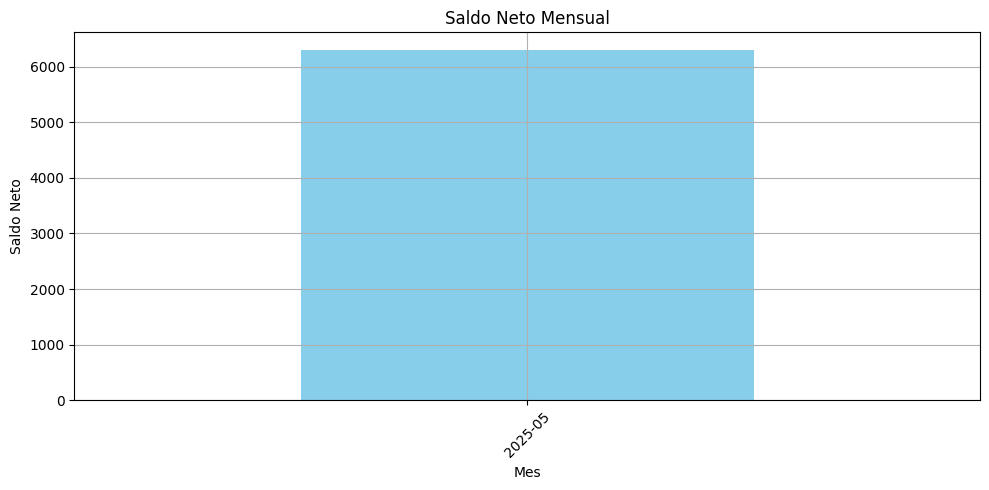

In [2]:
saldo_mensual = df.groupby("mes_año")["saldo_neto"].sum()

plt.figure(figsize=(10, 5))
saldo_mensual.plot(kind='bar', color='skyblue')
plt.title("Saldo Neto Mensual")
plt.xlabel("Mes")
plt.ylabel("Saldo Neto")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## 📊 Ingresos vs Egresos por Cuenta (último mes)


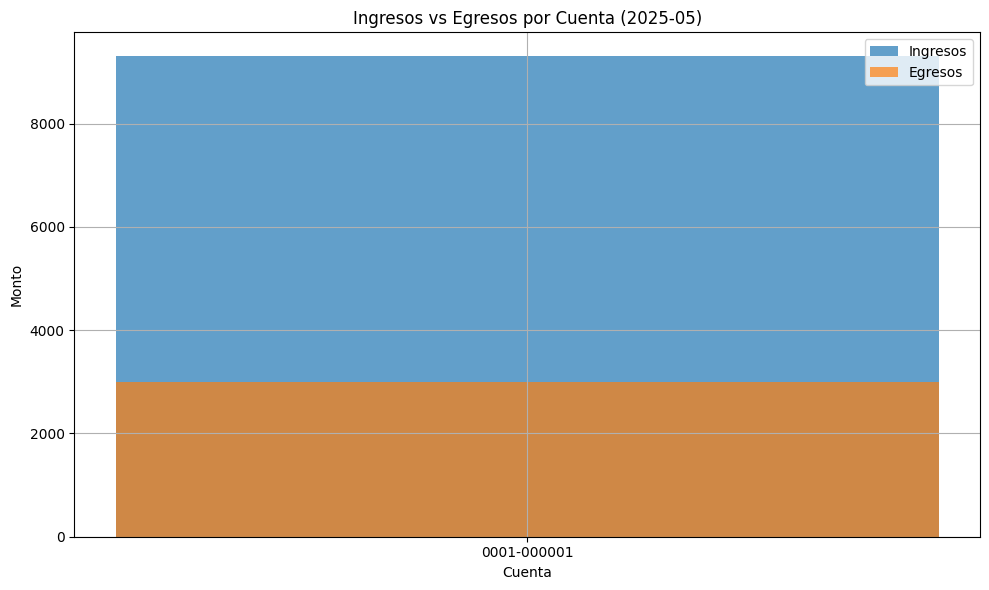

In [3]:
ultimo_mes = df['mes_año'].max()
df_ultimo = df[df['mes_año'] == ultimo_mes]

plt.figure(figsize=(10, 6))
plt.bar(df_ultimo['origen'], df_ultimo.get("total_monto_ingreso", 0), label="Ingresos", alpha=0.7)
plt.bar(df_ultimo['origen'], df_ultimo.get("total_monto_egreso", 0), label="Egresos", alpha=0.7)
plt.title(f"Ingresos vs Egresos por Cuenta ({ultimo_mes})")
plt.xlabel("Cuenta")
plt.ylabel("Monto")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
